In [1]:
import numpy as np
%matplotlib ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
import os
import fnmatch
from latexify import latexify
%matplotlib ipympl
%matplotlib ipympl
#%matplotlib inline
#%matplotlib inline
#import seaborn as sns # it will set to SNS style
#sns.reset_orig() # set back to the Matplotlib style
#sns.set() # set to sns style
# set the font
#plt.rcParams["font.family"] = 'arial'

In [2]:
# Ｌｏａｄ　ｄａｔａ
fpath = r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/'
fname='I-E_3temps_unsub*.txt'

fnames=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames.append(file)
        
print(fnames)

fidx=1
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

def loaddat(fpath,fname,*args): # args is expected to be [6,7] like showing which col to load
    f = os.path.join(fpath, fname)
    print(f)
    if len(args)==1:
        dat = np.genfromtxt(f, usecols=args[0]) # should put two colums
    else:
        dat = np.genfromtxt(f) # otherwise loda all
    return fname, dat[~np.isnan(dat[:,1]),:] 

I-E_3temps_unsub_Q[-0.9,-0.9,-2.9].txt
I-E_3temps_unsub_Q[-0.9,-0.9,0.9].txt
I-E_3temps_unsub_Q[-0.9,-0.9,2.9].txt
I-E_3temps_unsub_Q[-1-1-3].txt
I-E_3temps_unsub_Q[-1-11].txt
I-E_3temps_unsub_Q[-1-13].txt
I-E_3temps_unsub_Q[-1.9,-1.9,0].txt
I-E_3temps_unsub_Q[-2-20].txt
I-E_3temps_unsub_Q[0,0,-1.9].txt
I-E_3temps_unsub_Q[0,0,1.9].txt
I-E_3temps_unsub_Q[0.9,0.9,0.9].txt
I-E_3temps_unsub_Q[00-2].txt
I-E_3temps_unsub_Q[002].txt
I-E_3temps_unsub_Q[1.9,1.9,0].txt
I-E_3temps_unsub_Q[111].txt
I-E_3temps_unsub_Q[220].txt
['I-E_3temps_unsub_Q[-0.9,-0.9,-2.9].txt', 'I-E_3temps_unsub_Q[-0.9,-0.9,0.9].txt', 'I-E_3temps_unsub_Q[-0.9,-0.9,2.9].txt', 'I-E_3temps_unsub_Q[-1-1-3].txt', 'I-E_3temps_unsub_Q[-1-11].txt', 'I-E_3temps_unsub_Q[-1-13].txt', 'I-E_3temps_unsub_Q[-1.9,-1.9,0].txt', 'I-E_3temps_unsub_Q[-2-20].txt', 'I-E_3temps_unsub_Q[0,0,-1.9].txt', 'I-E_3temps_unsub_Q[0,0,1.9].txt', 'I-E_3temps_unsub_Q[0.9,0.9,0.9].txt', 'I-E_3temps_unsub_Q[00-2].txt', 'I-E_3temps_unsub_Q[002].txt', 'I-E_3temp

In [6]:
# Ｐｌｏｔ　ｔｈｅ [00-2]
#%matplotlib inline
fidx=4
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']
fig=plt.figure(figsize=(3,2))
ax = fig.add_subplot(111)#, yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
for i in [0,1,2]:
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    ax.errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                ecolor=mcolor[i], mec=mcolor[i],mfc='none')
    
# plt.text(0.35,0.1,r'Q$=(200)$',size=15, ha='center', va='center',
#         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax.set_xlim([-0.2,0.5])    
ax.set_ylim([0.002,3.5])  
ax.legend(numpoints=1,frameon=False, loc='best')  
#ax.set_yscale('log')
ax.set_xlabel('E (meV)',size=14)
ax.set_ylabel('Intensity (a.u.)',size=14)

#fig.savefig((fpath+fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
#plt.title(fnames[fidx][:-4])

plt.show()
#fig.set_size_inches([3,2])

I-E_3temps_unsub_Q[-1-11].txt


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


I-E_3temps_unsub_Q[-1.9,-1.9,0].txt


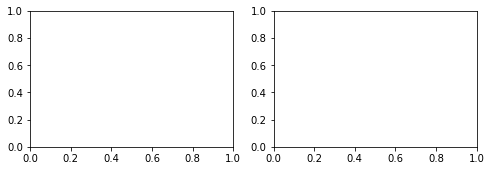

interactive(children=(FloatSlider(value=-4.5, description='x1', max=3.0, min=-10.0, step=0.01), FloatSlider(va…

<function __main__.manipulate(x1=0.45, x2=20, x3=0)>

In [4]:
#%matplotlib inline
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

fidx=6
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']

fig, axs = plt.subplots(figsize=(8,2.5),nrows=1,ncols=2)
 
def bose(hw,T,method): # http://ifit.mccode.org/Treatment.html#mozTocId906474
    if method==0: #['Schofield', 'Boltzmann']
        return np.exp(hw*11.6/T/2)
    elif method==1: #['harmonic','Bader']
        return hw*11.6/T / (1-np.exp(-hw*11.6/T))
    else: #'standard'  or 'Frommhold'
        return 2./(1+np.exp(-hw*11.6/T))
    #return 1-np.exp(-11.6*en/t)
    
method =0
def manipulate(x1 = 0.45, x2 = 20, x3 = 0):
    global fig, axs
    axs[0].cla() 
    axs[1].cla()
    axs[1].axhline(y=0, c='black', lw=0.8) 
    
    i = 1 # 0：30mK, 1: 450mK
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    axs[0].errorbar(ie[mask,i*3], bose(ie[mask,i*3],x1,method) * (ie[mask,i*3+1]-x3)+x3, yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                              ecolor=mcolor[i], mec=mcolor[i],mfc='none')
    axs[0].plot(ie[mask,i*3], 1* bose(ie[mask,i*3],x1,method),ls='-',c=mcolor[i],lw=1)  
  
    j = 2  
    mask = ie[:,j*3+1]>0.
    axs[0].errorbar(ie[mask,j*3], bose(ie[mask,j*3],x2,method) * (ie[mask,j*3+1]-x3)+x3, yerr=ie[mask,j*3+2], fmt='o',ms=3, label=figlab[j],
                    ecolor=mcolor[j], mec=mcolor[j],mfc='none')
    axs[0].plot(ie[mask,j*3], 1*bose(ie[mask,j*3],x2,method),ls='-',c=mcolor[j],lw=1)  
    
    axs[1].errorbar(ie[mask,3], ie[mask,4]-ie[mask,7] , yerr=0*ie[mask,5],fmt='-o',ms=3)
    axs[1].errorbar(ie[mask,i*3], 
                    bose(ie[mask,i*3],x1,method)*(ie[mask,i*3+1]-x3) - bose(ie[mask,j*3],x2,method)*(ie[mask,j*3+1]-x3), 
                    yerr=0*ie[mask,i*3+2],
                    fmt='-o',ms=3)
    
    #axs[0].set_xlim([-0.2,0.5])    
    axs[0].set_ylim([0.002,3.5])
    axs[0].legend(numpoints=1,frameon=False, loc='best')  
    axs[0].set_yscale('log')
    axs[0].set_xlabel('E (meV)',size=14)
    axs[0].set_ylabel('Intensity (a.u.)',size=14)
    return fig

interact(manipulate, x1=widgets.FloatSlider(min=-10.,max=3,step=0.01,value=-4.5),
                     x2=widgets.FloatSlider(min=-30,   max=20, step=0.1,value=-20),
                     x3=widgets.FloatSlider(min=0,   max=0.1, step=0.001,value=0)) 

# Plot IE and IQ for [220] peaks

## Plot IE

In [3]:
# Ｐｌｏｔ　ｔｈｅ [-2-20]
latexify(columns=2)
#%matplotlib inline
fidx=7
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']
fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)#, yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
for i in [0,1,2]:
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    ax.errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                ecolor=mcolor[i], mec=mcolor[i],mfc='none')

plt.text(0.35,0.3,'Q$=(220)$',size=15, ha='center', va='center',
        backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
ax.set_xlim([-0.2,0.5])    
#ax.set_ylim([0.002,3.5])  
ax.legend(numpoints=1,frameon=False, loc='best')  
ax.set_yscale('log')
ax.set_xlabel('E (meV)',size=14)
ax.set_ylabel('Intensity (a.u.)',size=14)

#fig.savefig((fpath+fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
#plt.title(fnames[fidx][:-4])
plt.show()

I-E_3temps_unsub_Q[-2-20].txt


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


I-E_3temps_unsub_Q[-2-20].txt
I-E_3temps_unsub_Q[220].txt


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


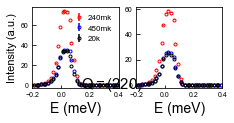

In [4]:
# Subplot I-E at Q=[220], [-2-20]
%matplotlib inline
latexify(fig_height=1.5,columns=1)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']

fig, axs = plt.subplots(ncols=2)

for idx, fidx in enumerate([7,15]):
    print(fnames[fidx])
    ie = np.genfromtxt(os.path.join(fpath, fnames[fidx]))

    for i in [0,1,2]:
        mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
        axs[idx].errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                          ecolor=mcolor[i], mec=mcolor[i],mfc='none')

    axs[idx].set_xlim([-0.2,0.4])    
    #axs[idx].set_ylim([0.002,3.5])  
    
    #axs[idx].set_yscale('log')
    axs[idx].set_xlabel('E (meV)',size=14)
    
    if idx==0:
        axs[idx].set_ylabel('Intensity (a.u.)',size=11)
        axs[idx].text(0.35,0.3,'Q$=(220)$',size=15, ha='center', va='center',
                       backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        axs[idx].legend(numpoints=1,frameon=False, loc='best',handletextpad=0)  

#fig.savefig((fpath+fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
#plt.title(fnames[fidx][:-4])
plt.show()

## Plot IQ

In [5]:
fpath = r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/'
fname='I-Q_3temps_unsub*.txt'

fnames0=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames0.append(file)
        
print(fnames0)

I-Q_3temps_unsub@Q[-2-20]_along(00L).txt
I-Q_3temps_unsub@Q[220]_along(00L).txt
['I-Q_3temps_unsub@Q[-2-20]_along(00L).txt', 'I-Q_3temps_unsub@Q[220]_along(00L).txt']


I-Q_3temps_unsub@Q[220]_along(00L).txt
I-Q_3temps_unsub@Q[-2-20]_along(00L).txt


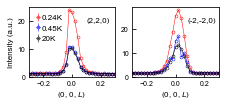

In [8]:
# Subplot I-Q at Q=[220], [-2-20] along (00L)
%matplotlib inline
latexify(fig_height=1.3,columns=1)

params = {'legend.fontsize': 8,
         'axes.labelsize': 8,
         'xtick.labelsize':7,
         'ytick.labelsize':7,
         'font.size':8}
import matplotlib as mpl
mpl.rcParams.update(params)

figlab=['0.24K','0.45K','20K']
mcolor=['r','b','k']
Qlabel=['(2,2,0)', '(-2,-2,0)']

fig, axs = plt.subplots(ncols=2)

for idx, fidx in enumerate([1,0]):
    print(fnames0[fidx])
    iq = np.genfromtxt(os.path.join(fpath, fnames0[fidx]))
    
    for i in [0,1,2]:
        mask = iq[:,i*3+1]>0. # use logY, so ignor the negative
        axs[idx].errorbar(iq[mask,i*3], iq[mask,i*3+1], yerr=iq[mask,i*3+2], fmt='-o',ms=3, mew=0.5,label=figlab[i],
                          ecolor=mcolor[i], mec=mcolor[i],mfc='none',color=mcolor[i],lw=0.5)
        #axs[idx].plot(iq[mask,i*3], iq[mask,i*3+1])


    axs[idx].set_xlim([-0.3,0.3])    
    #axs[idx].set_ylim([.9,3])  
    
    #axs[idx].set_yscale('log')
    axs[idx].set_xlabel('(0, 0, $L$)')
    
    if idx==0:
        axs[idx].set_ylabel('Intensity (a.u.)')
        axs[idx].legend(numpoints=1,frameon=False, loc='best',handletextpad=0.2,handlelength=0.5)  
    
    axs[idx].text(0.8,0.8,Qlabel[idx],ha='center', va='center',transform=axs[idx].transAxes,
                       backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
fig.savefig((fpath+fnames0[fidx]).replace('.txt','.pdf'),bbox_inches="tight",pad_inches=0.0, verbose=True)
plt.show()

# Plot IE and IQ for [113] peaks

I-E_3temps_unsub_Q[-1-1-3].txt
I-E_3temps_unsub_Q[-1-13].txt


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


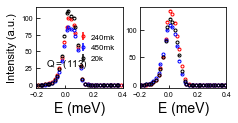

In [13]:
# Plot I-E at Q=[-1-1-3], [-1-13]
%matplotlib inline
latexify(fig_height=1.5,columns=1)

figlab=['240mk','450mk','20k']
mcolor=['r','b','k']

fig, axs = plt.subplots(ncols=2)

for idx, fidx in enumerate([3,5]):
    print(fnames[fidx])
    ie = np.genfromtxt(os.path.join(fpath, fnames[fidx]))

    for i in [0,1,2]:
        mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
        axs[idx].errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
                          ecolor=mcolor[i], mec=mcolor[i],mfc='none')

    axs[idx].set_xlim([-0.2,0.4])    
    #axs[idx].set_ylim([0.002,3.5])  
    
    #axs[idx].set_yscale('log')
    axs[idx].set_xlabel('E (meV)',size=14)
    
    if idx==0:
        axs[idx].set_ylabel('Intensity (a.u.)',size=11)
        axs[idx].text(0.35,0.3,'Q$=(113)$',size=10, ha='center', va='center',transform=axs[idx].transAxes,
                       backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))
        axs[idx].legend(numpoints=1,frameon=False, loc='best',handletextpad=0)  

#fig.savefig((fpath+fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
#plt.title(fnames[fidx][:-4])
plt.show()

<IPython.core.display.Javascript object>


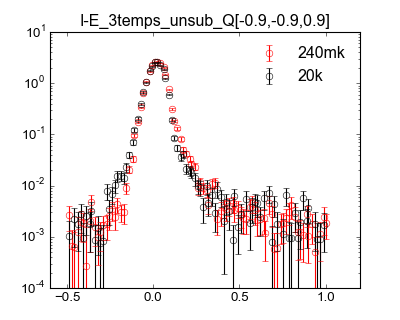

In [4]:
figlab=['240mk','450mk','20k']
mcolor=['r','b','k']
fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)#, yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
for i in [0,2]:
    mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
    ax.errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o', label=figlab[i],
                ecolor=mcolor[i], mec=mcolor[i],mfc='none')
plt.legend(numpoints=1,frameon=False, loc='best')  
ax.set_yscale('log')
plt.title(fnames[fidx][:-4])
plt.show()

In [27]:
2400/60.

40.0

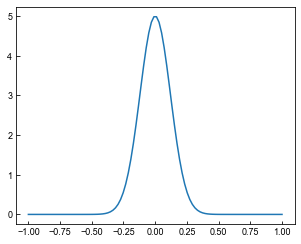

In [31]:
def lor_func(x,par):
    a,b,c=par
    return a/((x-c)**2+b**2)

def gau_func(x,*args):
    if len(args)==1:
        a,b,c = args[0]
        return a*np.exp(-(x-c)**2/(2*b**2))
    else:
        return args[0]*np.exp(-(x-args[2])**2/(2*args[1]**2))

def pv_func(x,*args):
    if len(args)==1:
        a1,b1,c,a2,b2 = args[0]
        return gau_func(x,[a1,b1,c])+lor_func(x,[a2,b2,c])
    else:
        return gau_func(x,[args[0],args[1],args[2]])+lor_func(x,[args[3],args[4],args[2]])
    
def pv_func0(x,*args): # pv+cons
    if len(args)==1:
        a1,b1,c,a2,b2,cons = args[0]
        return gau_func(x,[a1,b1,c])+lor_func(x,[a2,b2,c])+cons
    else:
        return gau_func(x,[args[0],args[1],args[2]])+lor_func(x,[args[3],args[4],args[2]])+args[5]
    
def fitfun(x,*args): # Gaussion+Exp
    if len(args)==1:
        a1,b1,c1, d, e, f = args[0]
        return gau_func(x,[a1,b1,c1])+ d*np.exp(-(e*x)**f)
    else:
        return gau_func(x,[args[0],args[1],args[2]])+ args[3]*np.exp(-(args[4]*x)**args[5])

def fitfun0(x,*args):# Lor+Exp
    if len(args)==1:
        a1,b1,c1, d, e, f = args[0]
        return lor_func(x,[a1,b1,c1])+ d*np.exp(-(e*x)**f)
    else:
        return lor_func(x,[args[0],args[1],args[2]])+ args[3]*np.exp(-(args[4]*x)**args[5])

def fitfun1(x,*args):# PV + Exp
    if len(args)==1:
        a1,b1,c1,a2,b2,c2, d, e, f = args[0]
        return pv_func(x,[a1,b1,c1,a2,b2,c2])+ d*np.exp(-(e*x)**f)
    else:
        return pv_func(x,[args[0],args[1],args[2],args[3],args[4],args[5]])+ args[6]*np.exp(-(args[7]*x)**args[7])
def fitfun2(x,*args):# PV + Exp
    if len(args)==1:
        a1,b1,c1,a2,b2,c2, d, e, f = args[0]
        return pv_func(x,[a1,b1,c1,a2,b2,c2])+ d*np.exp(-(e*x)**f)
    else:
        return pv_func(x,[args[0],args[1],args[2],args[3],args[4],args[5]])+ args[6]*np.exp(-(args[7]*x)**args[7])

    
def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

%matplotlib notebook
x=np.linspace(-1,1,100)
#plt.plot(x,fitfun(x,[5,0.12,0, 0.005,0.12,0,1,-0.5, 1]))
fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
plt.plot(x,gau_func(x, [5,0.12,0]))
plt.show()

# Fit the 20K data at a Q then do subtraction

In [33]:
# At which Q: 
# Select a file in the fname list and load data
fname, dat = loaddat(fpath,fnames[9],(6,7)) # col 6 and 7 are the 20K data
print(fname) #, dat

D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/I-E_3temps_unsub_Q[0,0,1.9].txt
I-E_3temps_unsub_Q[0,0,1.9].txt


('Data', 'Fitting')


interactive(children=(FloatSlider(value=-0.5, description='x1', max=0.5, min=-1.0, step=0.05), FloatSlider(val…

<function __main__.pltFitReg(x1=-0.5, x2=0.5)>

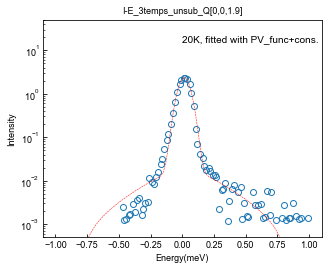

In [36]:
# Ｕｓｅ　the curve_fit with PV function with ajusting fitting range
from ipywidgets import interact, interactive, fixed # in the 'notebook' mode, '@interact' gives only one fig
import ipywidgets as widgets
from scipy import optimize

fig_label = ('Data', r'Fitting')
print(fig_label)
pars = []
def pltFitReg(x1=-0.5,x2=0.5):
    global fig, ax, pars
    ax.cla()  # clear axis
    ax.plot(dat[:,0], dat[:,1], 'o', mfc='none',label=fig_label[0])
    p0 = [2.36, 0.045, 0.016, 0.0013, 0.28, 0]

    p, pcov = optimize.curve_fit(pv_func0, fitReg(dat,x1,x2)[:,0], fitReg(dat,x1,x2)[:,1],
                                     p0)
    print(p)
    pars = p
    x = np.linspace(-1, 1, 100)
    ax.plot(x, pv_func0(x, p), 'r--', lw=0.5, alpha=1, label=fig_label[1])     
#     p, pcov = optimize.curve_fit(gau_func, fitReg(dat,x1,x2)[:,0], fitReg(dat,x1,x2)[:,1],
#                                 [10,0.12,0])
#     x = np.linspace(-1, 1, 100)
#     ax.plot(x, gau_func(x, p), 'r--', lw=0.5, alpha=1, label=fig_label[1])   
    ax.set_yscale('log')
    ax.set_ylim(0.0005, 50)
    ax.set_xlabel('Energy(meV)')
    ax.set_ylabel('Intensity')
    ax.text(0.5, 0.9, '20K, fitted with PV_func+cons.',transform=ax.transAxes,fontsize=10)
    plt.title(fname[:-4])    
    
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=-1,max=0.5,step=0.05,value=-0.5),
         x2=widgets.FloatSlider(min=0.1,max=1,step=0.05,value=0.95)) 

# calculate error
# da, db, dc, dP, dfp, dfw = \
#           [np.sqrt(nlpcov[j,j]) for j in range(nlfit.size)]

In [38]:
# Do subtraction: Load 240mk and 450mk data respectively
whichD = ['240mK','450mK']

didx = 0 # which data for subtraction: 0 for 240mK and 1 for 450mK
fname0, dat0 = loaddat(fpath,fnames[9],(didx*3,didx*3+1)) # Col 0 and 1; Col 3 and 4: 240mK and 450mK
print(fname[:-4]) #, dat

didx = 1 # which data for subtraction: 0 for 240mK and 1 for 450mK
_, dat1 = loaddat(fpath,fnames[9],(didx*3,didx*3+1)) # Col 0 and 1; Col 3 and 4: 240mK and 450mK
print (fname[:-4]) #, dat

D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/I-E_3temps_unsub_Q[0,0,1.9].txt
I-E_3temps_unsub_Q[0,0,1.9]
D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/I-E_3temps_unsub_Q[0,0,1.9].txt
I-E_3temps_unsub_Q[0,0,1.9]


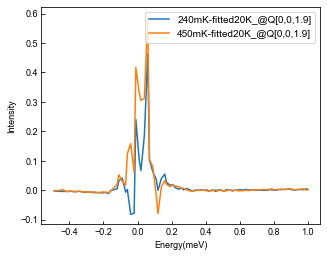

In [39]:
# Subtract and plot
fig, ax = plt.subplots(figsize=(5, 4))

plt.plot(dat0[:,0], dat0[:,1] - pv_func0(dat0[:,0],pars),label=whichD[0]+'-fitted20K_@'+fname[-14:-4])
plt.plot(dat1[:,0], dat1[:,1] - pv_func0(dat1[:,0],pars),label=whichD[1]+'-fitted20K_@'+fname[-14:-4])

ax.set_xlabel('Energy(meV)')
ax.set_ylabel('Intensity')
#ax.set_yscale('log')
plt.legend(fontsize=10,loc='best')
#plt.title(whichD[didx]+'-fitted20K_@'+fname[-14:-4])
#fig.savefig(os.path.join(fpath, r'240mK-fitted20K@0.9[111].png'), bbox_inches="tight", verbose=True) 
plt.show()

In [41]:
# Use lmfit for two StrechedExpo; fitted with adding par consetively
from lmfit import minimize,Model, Minimizer, Parameters, Parameter, report_fit
import numpy as np

def pv_func1(x,ga,gw,gc,la,lw,lc,cons):
    return gau_func(x,[ga,gw,gc])+lor_func(x,[la,lw,lc])+cons

def streExp(x,p1,p2,p3,p4,p5,p6,p7):
    return p1*np.exp(-(p2*x)**p3)+ p4*np.exp(-(p5*x)**p6)+p7

gmod=Model(streExp)
params = gmod.make_params()
print(gmod.param_names)
print(gmod.independent_vars)

# params['ga'].set(value=3.6,   vary=True, min=None, max=None, expr=None)
# params['gw'].set(value=0.042, vary=True, min=None, max=None, expr=None)
# params['gc'].set(value=0,     vary=True, min=None, max=None, expr=None)
# params['la'].set(value=1.24,  vary=True, min=None, max=None, expr=None)
# params['lw'].set(value=2.5,   vary=True, min=None, max=None, expr=None)
# params['lc'].set(value=0,     vary=True, min=None, max=None, expr='gc')
# params['cons'].set(value=0,   vary=True, min=0.001, max=None, expr=None)

params['p1'].set(value=4,   vary=True, min=0, max=None, expr=None)
params['p2'].set(value=0.5, vary=True, min=0, max=None, expr=None)
params['p3'].set(value=1, vary=True, min=0.2, max=None, expr=None)
params['p4'].set(value=0.1, vary=False, min=0, max=None, expr=None)
params['p5'].set(value=0.5, vary=False, min=0, max=2, expr=None)
params['p6'].set(value=1,   vary=False, min=0, max=2, expr=None)

params['p7'].set(value=0, vary=True, min=None, max=None, expr=None)

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']
['x']


interactive(children=(FloatSlider(value=0.05, description='x1', max=0.5, min=0.05, step=0.05), FloatSlider(val…

<function __main__.pltFitReg(x1=-0.5, x2=0.5)>

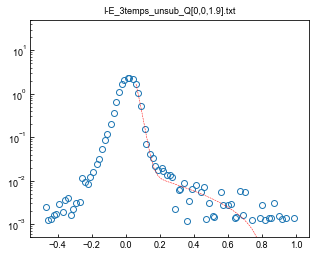

In [43]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib notebook

fig_label = ('Data', r'Fitting')

def pltFitReg(x1=-0.5,x2=0.5):
    global fig, ax, gmod, params
    ax.cla()  
    ax.plot(dat[:,0], dat[:,1], 'o', mfc='none',label=fig_label[0])

    result = gmod.fit(fitReg(dat,x1,x2)[:,1], x=fitReg(dat,x1,x2)[:,0],params = params)
    #print result.fit_report(modelpars=None, show_correl=False)
    #print 'fitted:','\n', result.params.valuesdict()
    
    # load the  new params as initio 
    params.loads(result.params.dumps()) # reset the params values to the fitted ones
    #print params.valuesdict()
    
    # add new pars to fit
    params['p4'].set(vary=True)
    params['p5'].set(vary=True)
    
    result = gmod.fit(fitReg(dat,x1,x2)[:,1], x=fitReg(dat,x1,x2)[:,0],params = params) 
    #print result.fit_report(modelpars=None, show_correl=False)
    
    params.loads(result.params.dumps()) 
    params['p6'].set(vary=False)
    
    result = gmod.fit(fitReg(dat,x1,x2)[:,1], x=fitReg(dat,x1,x2)[:,0],params = params) 
    print(result.fit_report(modelpars=None, show_correl=False))
  
    ax.plot(fitReg(dat,x1,x2)[:,0], result.best_fit, 'r--', lw=0.5, alpha=1, label=fig_label[1])     
 
    ax.set_yscale('log')
    ax.set_ylim(0.0005, 50)
    
    plt.title(fname)
    #fig.savefig(os.path.join(fpath, r'[002]_log.png'), bbox_inches="tight", verbose=True) 
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=0.05,max=0.5,step=0.05,value=-0.5),
         x2=widgets.FloatSlider(min=0.1,max=1,step=0.05,value=0.8)) 


# Only smooth data

In [12]:
# At which Q: 
# Select a file in the fname list and load data
from scipy.signal import savgol_filter

fname, dat = loaddat(fpath,fnames[9]) #dat:col [0,1], [3,4], and [6,7] are the 240mK, 450mK and 20K
print fname #, dat

D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace\I-E_3temps_unsub_Q[0,0,1.9].txt
I-E_3temps_unsub_Q[0,0,1.9].txt


<IPython.core.display.Javascript object>


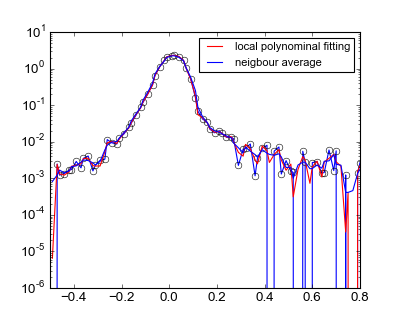

In [13]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

fig, ax = plt.subplots(figsize=(5, 4))
plt.plot(dat[:,6],dat[:,7],marker='o', mfc='none')

# use savgol_filter
yhat = savgol_filter(dat[:,7], 7, 5) # window size 7, polynomial order 5
plt.plot(dat[:,6],yhat, color='red', label='local polynominal fitting')

# use numpy.convolve
plt.plot(dat[:,6],smooth(dat[:,7], 10), color='b',label='neigbour average')
ax.set_yscale('log')
ax.set_xlim([-0.5,0.8])
plt.legend(fontsize=10,loc='best')
plt.show()

## Extrac the gap

In [44]:
# Ｌｏａｄ　ｄａｔａ
fpath = r'D:\5_Neutron Scattering\5_CNCS_US_2015\use_horace/'
fname='I-E_3temps_Sum*.txt'

fnames=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames.append(file)

fidx=1
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)


I-E_3temps_Sum_aiaoBragg_unsub&sub.txt
I-E_3temps_Sum_midE_Qs_unsub&sub.txt
I-E_3temps_Sum_pinch_around_zero_unsub&sub.txt
I-E_3temps_Sum_midE_Qs_unsub&sub.txt


I-E_3temps_Sum_aiaoBragg_unsub&sub.txt


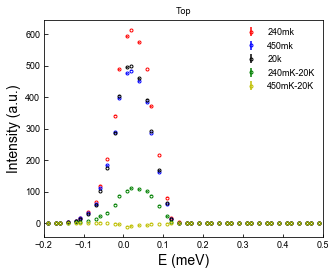

In [45]:
# Ｐｌｏｔ pinch point
# %matplotlib ipympl
# %matplotlib ipympl
figlab=['Top','Intermediate E','Gap']
fidx = 0
print(fnames[fidx])
f = os.path.join(fpath, fnames[fidx])
ie = np.genfromtxt(f)

linelab=['240mk','450mk','20k', '240mK-20K','450mK-20K']
mcolor=['r','b','k','g','y']
fig=plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)#, yscale='log')# autoscale_on=True, xlim=(0.01, 10), ylim=(0., 0.65),
for i in [0,1,2,3,4]:
#     mask = ie[:,i*3+1]>0. # use logY, so ignor the negative
#     ax.errorbar(ie[mask,i*3], ie[mask,i*3+1], yerr=ie[mask,i*3+2], fmt='o',ms=3, label=figlab[i],
#                 ecolor=mcolor[i], mec=mcolor[i],mfc='none')
    ax.errorbar(ie[:,i*3], ie[:,i*3+1], yerr=ie[:,i*3+2], fmt='o',ms=3, label=linelab[i],
                ecolor=mcolor[i], mec=mcolor[i],mfc='none')        
    
#ax.scatter(ie[:,0], ie[:,1]-1.03*ie[:,7],label='sub')

# plt.text(0.2,0.1,'Flat Modes\nIntegrate [-0.9,0.9]\nrectangle around zero',size=12, ha='left', va='center',
#         backgroundcolor='white',bbox=dict(facecolor='white', alpha=0, edgecolor='white', boxstyle='round'))

ax.set_xlim([-0.2,0.5])    
#ax.set_ylim([0.002,3.5])  
ax.legend(numpoints=1,frameon=False, loc='best')  
#ax.set_yscale('log')
ax.set_xlabel('E (meV)',size=14)
ax.set_ylabel('Intensity (a.u.)',size=14)

#fig.savefig((fpath+fnames[fidx]).replace('.txt','.pdf'),bbox_inches="tight", verbose=True)
#plt.title(fnames[fidx][:-4])
plt.title(figlab[fidx])
plt.show()

In [46]:
# Use lmfit for two StrechedExpo; fitted with adding par consetively
from lmfit import minimize,Model, Minimizer, Parameters, Parameter, report_fit
import numpy as np

def pv_func1(x,ga,gw,gc,la,lw,lc,cons):
    return gau_func(x,[ga,gw,gc])+lor_func(x,[la,lw,lc])+cons

def streExp(x,p1,p2,p3,p4,p5,p6,p7):
    return p1*np.exp(-(p2*x)**p3)+ p4*np.exp(-(p5*x)**p6)+p7

#gmod=Model(streExp)
gmod=Model(pv_func1)
params = gmod.make_params()
print(gmod.param_names)
print(gmod.independent_vars)

params['ga'].set(value=0.01,   vary=True, min=None, max=None, expr=None)
params['gw'].set(value=0.10, vary=True, min=None, max=None, expr=None)
params['gc'].set(value=0.07,     vary=True, min=None, max=None, expr=None)
params['la'].set(value=0.01,  vary=True, min=None, max=None, expr=None)
params['lw'].set(value=0.10,   vary=True, min=None, max=None, expr='gw')
params['lc'].set(value=0.07,     vary=True, min=None, max=None, expr='gc')
params['cons'].set(value=0,   vary=True, min=None, max=None, expr=None)

# params['p1'].set(value=4,   vary=True, min=0, max=None, expr=None)
# params['p2'].set(value=0.5, vary=True, min=0, max=None, expr=None)
# params['p3'].set(value=1, vary=True, min=0.2, max=None, expr=None)
# params['p4'].set(value=0.1, vary=False, min=0, max=None, expr=None)
# params['p5'].set(value=0.5, vary=False, min=0, max=2, expr=None)
# params['p6'].set(value=1,   vary=False, min=0, max=2, expr=None)
# params['p7'].set(value=0, vary=True, min=None, max=None, expr=None)

['ga', 'gw', 'gc', 'la', 'lw', 'lc', 'cons']
['x']


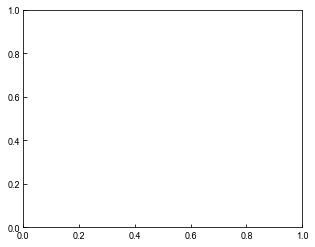

interactive(children=(FloatSlider(value=0.0, description='x1', max=0.0, min=-0.05, step=0.01), FloatSlider(val…

<function __main__.pltFitReg(x1=-0.0, x2=0.2)>

In [47]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline

allDat = ie[~np.isnan(ie[:,10]), :]
dat = allDat[:,9:11]

fig_label = ('Data', r'Fitting')

def pltFitReg(x1=-0.0,x2=0.2):
    global fig, ax, gmod, params
    ax.cla()  
    ax.plot(dat[:,0], dat[:,1], 'o', mfc='none',label=fig_label[0])

    result = gmod.fit(fitReg(dat,x1,x2)[:,1], x=fitReg(dat,x1,x2)[:,0],params = params)
    #print result.fit_report(modelpars=None, show_correl=False)
    print('fitted:','\n', result.params.valuesdict())
     
    ax.plot(fitReg(dat,x1,x2)[:,0], result.best_fit, 'r-', lw=0.5, alpha=1, label=fig_label[1])     

    ax.set_xlim(-0.3, 0.4)
    
    ax.set_xlabel('E (meV)',size=14)
    ax.set_ylabel('Intensity (a.u.)',size=14)
    
    #plt.title(fname)
    #fig.savefig(os.path.join(fpath, r'[002]_log.png'), bbox_inches="tight", verbose=True) 
    return fig

fig, ax = plt.subplots(figsize=(5, 4))#,subplot_kw={'axisbg':'#EEEEEE','axisbelow':True})

interact(pltFitReg, x1=widgets.FloatSlider(min=-0.05,max=0.00,step=0.01,value=0),
         x2=widgets.FloatSlider(min=0.1,max=0.5,step=0.01,value=0.2)) 


In [ ]:
# Plot I-Q plots

# Learning

In [2]:
# Ｌｅａｒｎ　Ｓｍｏｏｔｈ　ｄａｔａ
# http://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way
import numpy as np
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.1

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
plt.figure()
plt.plot(x, y,'o')
plt.plot(x, smooth(y,5), 'r-', lw=2)
plt.plot(x, smooth(y,20), 'g-', lw=2)
plt.show()

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


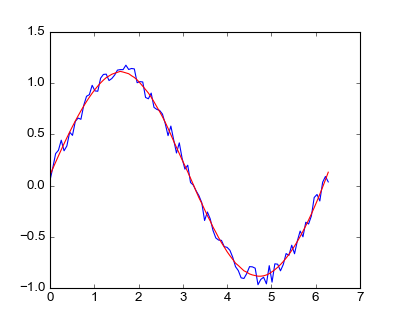

In [15]:
#I prefer a Savitzky-Golay filter. It uses least squares to regress a small window of your data onto a polynomial, then uses the polynomial to estimate the point in the center of the window. Finally the window is shifted forward by one data point and the process repeats. This continues until every point has been optimally adjusted relative to its neighbors. It works great even with noisy samples from non-periodic and non-linear sources.

import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 41, 3) # window size 51, polynomial order 3

plt.figure(figsize=[5,4])
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

In [16]:
# Ｌｅａｒｎ　ｌｍｆｉｔ

p = Parameters()
#           (Name,  Value,  Vary,   Min,  Max,  Expr)
p.add_many(('amp1',    10,  True, None, None,  None),
           ('cen1',   1.2,  True,  0.5,  2.0,  None),
           ('wid1',   0.8,  True,  0.1, None,  None),
           ('amp2',   7.5,  True, None, None,  None),
           ('cen2',   1.9,  True,  1.0,  3.0,  None),
           ('wid2',  None, False, None, None, '2*wid1/3'))

In [1]:
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2 * x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2) )

# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """ model decaying sine wave, subtract data"""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x * omega + shift) * np.exp(-x*x*decay)
    return model - data

# create a set of Parameters
params = Parameters()
params.add('amp',   value= 10,  min=0)
params.add('decay', value= 0.1)
params.add('shift', value= 0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value= 3.0)


# do fit, here with leastsq model
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
kws  = {'options': {'maxiter':10}}
result = minner.minimize()


# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
try:
    import pylab
    pylab.plot(x, data, 'k+')
    pylab.plot(x, final, 'r')
    pylab.show()
except:
    pass


[[Fit Statistics]]
    # function evals   = 61
    # data points      = 301
    # variables        = 4
    chi-square         = 12.302
    reduced chi-square = 0.041
    Akaike info crit   = -954.397
    Bayesian info crit = -939.568
[[Variables]]
    amp:     4.99115396 +/- 0.040510 (0.81%) (init= 10)
    decay:   0.02572230 +/- 0.000477 (1.86%) (init= 0.1)
    shift:  -0.08556395 +/- 0.010454 (12.22%) (init= 0)
    omega:   1.99738386 +/- 0.003383 (0.17%) (init= 3)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, omega)              = -0.786 
    C(amp, decay)                =  0.584 
    C(amp, shift)                = -0.121 


In [18]:
# Creating a python lmfit Model with arbitrary number of parameters
import numpy as np

from lmfit import Model, Parameters

def my_poly(x, **params):# here use **kws not *args
    val= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        val += params[pname]*x**i
    return val

my_model = Model(my_poly)

# Parameter names and starting values
params = Parameters()
params.add('C00', value=-10)
params.add('C01', value=  5)
params.add('C02', value=  1)
params.add('C03', value=  0)
params.add('C04', value=  0)

x = np.linspace(-20, 20, 101)
y = -30.4 + 7.8*x - 0.5*x*x + 0.03 * x**3 + 0.009*x**4
y = y + np.random.normal(size=len(y), scale=0.2)

out = my_model.fit(y, params, x=x)
print(out.fit_report())

[[Model]]
    Model(my_poly)
[[Fit Statistics]]
    # function evals   = 15
    # data points      = 101
    # variables        = 5
    chi-square         = 3.423
    reduced chi-square = 0.036
    Akaike info crit   = -331.844
    Bayesian info crit = -318.768
[[Variables]]
    C00:  -30.3770847 +/- 0.035237 (0.12%) (init=-10)
    C01:   7.79679617 +/- 0.004029 (0.05%) (init= 5)
    C02:  -0.50051221 +/- 0.000541 (0.11%) (init= 1)
    C03:   0.03001350 +/- 1.51e-05 (0.05%) (init= 0)
    C04:   0.00900205 +/- 1.48e-06 (0.02%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(C02, C04)                  = -0.958 
    C(C01, C03)                  = -0.917 
    C(C00, C02)                  = -0.745 
    C(C00, C04)                  =  0.600 

